# Quantitative Trading from Scratch - Complete Tutorial

Welcome to your first hands-on quantitative trading tutorial! This notebook will take you through the entire process of developing, testing, and evaluating a trading strategy.

## What You'll Learn:
1. **Data Acquisition**: How to download and explore financial data
2. **Technical Analysis**: Calculate popular trading indicators
3. **Strategy Development**: Create systematic trading rules
4. **Backtesting**: Test strategies on historical data
5. **Performance Evaluation**: Measure strategy effectiveness
6. **Visualization**: Create compelling charts and analysis

## Prerequisites:
- Basic Python knowledge
- Understanding of basic financial concepts (stocks, prices, returns)

Let's begin our quantitative trading journey! 🚀

## 1. Import Required Libraries

First, let's import all the essential Python libraries we'll need for our quantitative trading analysis.

In [17]:
# Core data manipulation and analysis libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# For proxy configuration (needed for users in China)
import os
import requests

# Financial data acquisition
import yfinance as yf

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


proxy_url = f"http://localhost:10809"

# Set up proxy environment variables
os.environ['HTTP_PROXY'] = proxy_url
os.environ['HTTPS_PROXY'] = proxy_url

# Configure requests session with proxy
proxy_dict = {
    'http': proxy_url,
    'https': proxy_url
}


# Test proxy connection
print("\n🔌 Testing proxy connection...")
response = requests.get("https://httpbin.org/ip", proxies=proxy_dict, timeout=10)
if response.status_code == 200:
    print("✅ Proxy connection successful!")
    ip_info = response.json().get('origin', 'Unknown')
    print(f"   Your IP via proxy: {ip_info}")
else:
    print("❌ Proxy connection failed")



🔌 Testing proxy connection...
✅ Proxy connection successful!
   Your IP via proxy: 157.254.38.146
✅ Proxy connection successful!
   Your IP via proxy: 157.254.38.146


## 2. Load and Explore Financial Data

Now let's download historical price data for our analysis. We'll use Apple (AAPL) as our example stock, but you can easily change this to any ticker symbol you're interested in.

In [25]:
# Define our stock and date range
symbol = "NVDA"  # Change this to any stock ticker you want
start_date = "2025-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

print(f"📈 Getting {symbol} data from {start_date} to {end_date}")


# Create a session with proxy
session = requests.Session()
session.proxies.update({
    'http': f'http://{PROXY_HOST}:{PROXY_PORT}',
    'https': f'http://{PROXY_HOST}:{PROXY_PORT}'
})

# Download with proxy session
ticker = yf.Ticker(symbol)
ticker.session = session
data = ticker.history(start=start_date, end=end_date)

# Clean up column names if needed
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(0)

# Remove any missing data
data = data.dropna()

print(f"✅ Got {len(data)} days of data")
print(f"📅 From {data.index[0].date()} to {data.index[-1].date()}")
print(f"💰 Latest price: ${data['Close'].iloc[-1]:.2f}")
    


📈 Getting NVDA data from 2025-01-01 to 2025-07-07
✅ Got 125 days of data
📅 From 2025-01-02 to 2025-07-03
💰 Latest price: $159.34
✅ Got 125 days of data
📅 From 2025-01-02 to 2025-07-03
💰 Latest price: $159.34


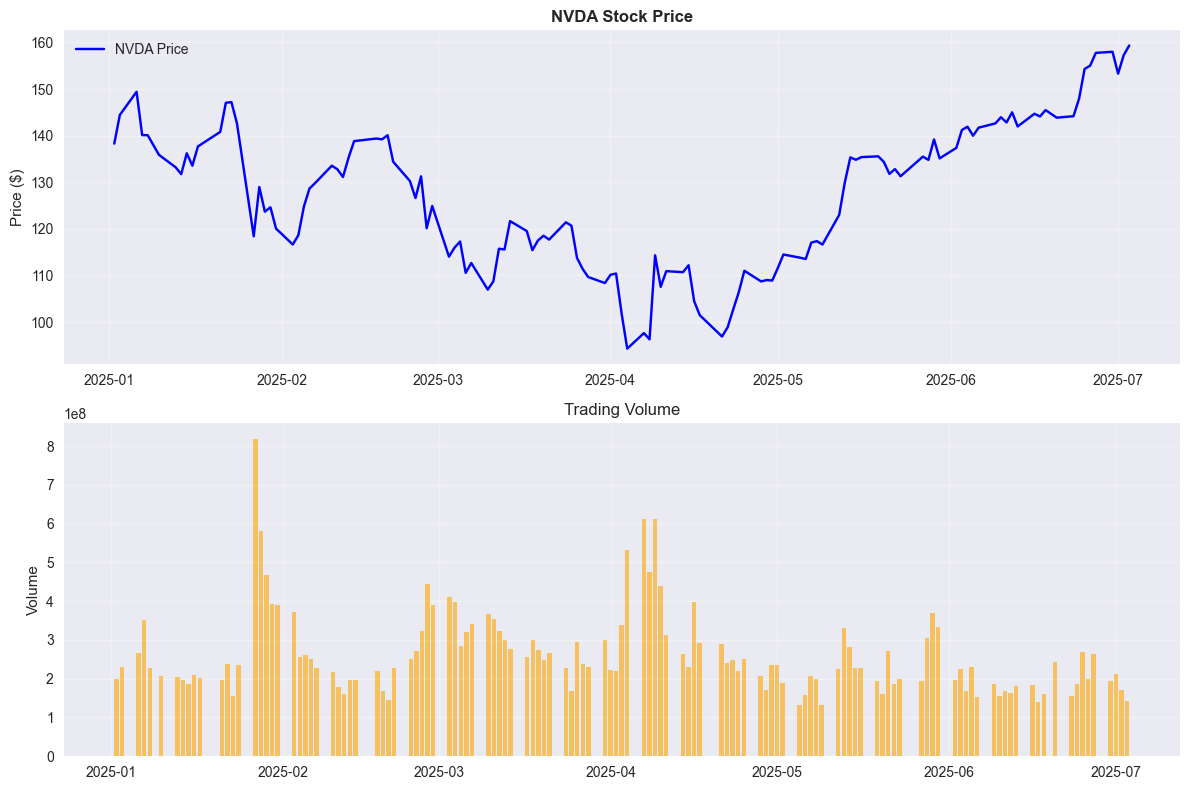


📊 Quick Stats:
💰 Current Price: $159.34
📈 Average Daily Return: 0.192%
📊 Price Range: $94.30 - $159.34
🔢 Average Volume: 262.4M shares

✅ Charts created! Let's move on to technical indicators.


In [26]:
# Simple price chart with key data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# 1. Price chart
ax1.plot(data.index, data['Close'], color='blue', label=f'{symbol} Price')
ax1.set_title(f'{symbol} Stock Price', fontweight='bold')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Volume
ax2.bar(data.index, data['Volume'], alpha=0.6, color='orange')
ax2.set_title('Trading Volume')
ax2.set_ylabel('Volume')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate daily returns and simple stats
data['Daily_Return'] = data['Close'].pct_change()

print(f"\n📊 Quick Stats:")
print(f"💰 Current Price: ${data['Close'].iloc[-1]:.2f}")
print(f"📈 Average Daily Return: {data['Daily_Return'].mean()*100:.3f}%")
print(f"📊 Price Range: ${data['Close'].min():.2f} - ${data['Close'].max():.2f}")
print(f"🔢 Average Volume: {data['Volume'].mean()/1e6:.1f}M shares")

print("\n✅ Charts created! Let's move on to technical indicators.")

## 3. Calculate Technical Indicators

Technical indicators are mathematical calculations based on price and volume data that help traders identify trends, momentum, and potential reversal points. Let's implement some popular indicators from scratch!

In [27]:
# Function to calculate Simple Moving Average (SMA)
def calculate_sma(prices, window):
    """Calculate Simple Moving Average"""
    return prices.rolling(window=window).mean()

# Function to calculate Exponential Moving Average (EMA)
def calculate_ema(prices, window):
    """Calculate Exponential Moving Average"""
    return prices.ewm(span=window).mean()

# Function to calculate RSI (Relative Strength Index)
def calculate_rsi(prices, window=14):
    """Calculate RSI indicator"""
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(prices, fast=12, slow=26, signal=9):
    """Calculate MACD indicator"""
    ema_fast = calculate_ema(prices, fast)
    ema_slow = calculate_ema(prices, slow)
    macd = ema_fast - ema_slow
    signal_line = calculate_ema(macd, signal)
    histogram = macd - signal_line
    return macd, signal_line, histogram

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(prices, window=20, num_std=2):
    """Calculate Bollinger Bands"""
    sma = calculate_sma(prices, window)
    std = prices.rolling(window=window).std()
    upper_band = sma + (std * num_std)
    lower_band = sma - (std * num_std)
    return upper_band, sma, lower_band

# Calculate all indicators
print("🔧 Calculating Technical Indicators...")

# Moving Averages
data['SMA_20'] = calculate_sma(data['Close'], 20)
data['SMA_50'] = calculate_sma(data['Close'], 50)
data['EMA_12'] = calculate_ema(data['Close'], 12)
data['EMA_26'] = calculate_ema(data['Close'], 26)

# RSI
data['RSI'] = calculate_rsi(data['Close'])

# MACD
data['MACD'], data['MACD_Signal'], data['MACD_Histogram'] = calculate_macd(data['Close'])

# Bollinger Bands
data['BB_Upper'], data['BB_Middle'], data['BB_Lower'] = calculate_bollinger_bands(data['Close'])

print("✅ Technical indicators calculated successfully!")
print(f"\n📊 Available indicators:")
indicators = ['SMA_20', 'SMA_50', 'EMA_12', 'EMA_26', 'RSI', 'MACD', 'MACD_Signal', 'BB_Upper', 'BB_Lower']
for indicator in indicators:
    print(f"  • {indicator}")

# Display latest values
print(f"\n📈 Latest Indicator Values ({data.index[-1].date()}):")
print(f"Close Price: ${data['Close'].iloc[-1]:.2f}")
print(f"SMA 20: ${data['SMA_20'].iloc[-1]:.2f}")
print(f"SMA 50: ${data['SMA_50'].iloc[-1]:.2f}")
print(f"RSI: {data['RSI'].iloc[-1]:.2f}")
print(f"MACD: {data['MACD'].iloc[-1]:.4f}")

🔧 Calculating Technical Indicators...
✅ Technical indicators calculated successfully!

📊 Available indicators:
  • SMA_20
  • SMA_50
  • EMA_12
  • EMA_26
  • RSI
  • MACD
  • MACD_Signal
  • BB_Upper
  • BB_Lower

📈 Latest Indicator Values (2025-07-03):
Close Price: $159.34
SMA 20: $148.16
SMA 50: $134.08
RSI: 70.98
MACD: 6.5652


## 4. Develop a Simple Trading Strategy

Now let's create our first systematic trading strategy! We'll implement a **Moving Average Crossover Strategy**:

**Strategy Rules:**
- **Buy Signal**: When the fast moving average (SMA 20) crosses above the slow moving average (SMA 50)
- **Sell Signal**: When the fast moving average crosses below the slow moving average
- **Risk Management**: We'll add RSI filter to avoid buying in overbought conditions

In [28]:
# Strategy Implementation: Moving Average Crossover with RSI Filter

def generate_signals(data, fast_ma='SMA_20', slow_ma='SMA_50', rsi_col='RSI'):
    """
    Generate trading signals based on moving average crossover with RSI filter
    
    Parameters:
    - data: DataFrame with price data and indicators
    - fast_ma: Column name for fast moving average
    - slow_ma: Column name for slow moving average  
    - rsi_col: Column name for RSI
    
    Returns:
    - DataFrame with added signal columns
    """
    signals = data.copy()
    
    # Initialize signal columns
    signals['Position'] = 0  # 0: No position, 1: Long, -1: Short
    signals['Signal'] = 0    # 0: Hold, 1: Buy, -1: Sell
    
    # Create buy/sell conditions
    # Buy when fast MA crosses above slow MA AND RSI < 70 (not overbought)
    buy_condition = (
        (signals[fast_ma] > signals[slow_ma]) & 
        (signals[fast_ma].shift(1) <= signals[slow_ma].shift(1)) &
        (signals[rsi_col] < 70)
    )
    
    # Sell when fast MA crosses below slow MA OR RSI > 80 (very overbought)
    sell_condition = (
        (signals[fast_ma] < signals[slow_ma]) & 
        (signals[fast_ma].shift(1) >= signals[slow_ma].shift(1))
    ) | (signals[rsi_col] > 80)
    
    # Generate signals
    signals.loc[buy_condition, 'Signal'] = 1   # Buy signal
    signals.loc[sell_condition, 'Signal'] = -1 # Sell signal
    
    # Calculate positions (cumulative effect of signals)
    signals['Position'] = signals['Signal'].replace(0, np.nan).fillna(method='ffill').fillna(0)
    
    return signals

# Generate trading signals
print("🎯 Generating Trading Signals...")
strategy_data = generate_signals(data)

# Count signals
buy_signals = (strategy_data['Signal'] == 1).sum()
sell_signals = (strategy_data['Signal'] == -1).sum()

print(f"✅ Strategy signals generated!")
print(f"📈 Buy signals: {buy_signals}")
print(f"📉 Sell signals: {sell_signals}")

# Show recent signals
recent_signals = strategy_data[strategy_data['Signal'] != 0].tail(10)
if len(recent_signals) > 0:
    print(f"\n🔍 Recent Signals:")
    for idx, row in recent_signals.iterrows():
        signal_type = "BUY" if row['Signal'] == 1 else "SELL"
        print(f"  {idx.date()}: {signal_type} at ${row['Close']:.2f} (RSI: {row['RSI']:.1f})")
else:
    print("\n🔍 No recent signals in the data")

# Display current position
current_position = strategy_data['Position'].iloc[-1]
position_status = "LONG" if current_position == 1 else "SHORT" if current_position == -1 else "NO POSITION"
print(f"\n📊 Current Position: {position_status}")

🎯 Generating Trading Signals...
✅ Strategy signals generated!
📈 Buy signals: 0
📉 Sell signals: 12

🔍 Recent Signals:
  2025-05-13: SELL at $129.92 (RSI: 88.5)
  2025-05-14: SELL at $135.33 (RSI: 89.0)
  2025-05-15: SELL at $134.82 (RSI: 86.1)
  2025-05-16: SELL at $135.39 (RSI: 92.7)
  2025-05-19: SELL at $135.56 (RSI: 92.6)
  2025-05-20: SELL at $134.37 (RSI: 89.5)
  2025-05-21: SELL at $131.79 (RSI: 81.4)
  2025-05-22: SELL at $132.82 (RSI: 80.3)
  2025-05-27: SELL at $135.49 (RSI: 81.3)
  2025-05-29: SELL at $139.18 (RSI: 80.1)

📊 Current Position: SHORT


## 5. Backtest the Trading Strategy

Backtesting is the process of testing our strategy on historical data to see how it would have performed. This is crucial for evaluating strategy effectiveness before risking real money.

In [29]:
# Backtesting Implementation

def backtest_strategy(data, initial_capital=10000, commission=0.001):
    """
    Backtest a trading strategy
    
    Parameters:
    - data: DataFrame with signals and positions
    - initial_capital: Starting capital
    - commission: Transaction cost as percentage (0.001 = 0.1%)
    
    Returns:
    - DataFrame with portfolio performance
    """
    
    # Create a copy for backtesting
    backtest = data.copy()
    
    # Initialize portfolio tracking variables
    backtest['Holdings'] = 0.0      # Number of shares held
    backtest['Cash'] = float(initial_capital)
    backtest['Portfolio_Value'] = float(initial_capital)
    backtest['Returns'] = 0.0
    
    # Track portfolio performance
    cash = initial_capital
    holdings = 0.0
    
    for i in range(1, len(backtest)):
        # Get current row
        current = backtest.iloc[i]
        previous = backtest.iloc[i-1]
        
        # Check for trading signals
        if current['Signal'] == 1 and previous['Position'] != 1:  # Buy signal
            # Buy as many shares as possible with available cash
            shares_to_buy = cash // (current['Close'] * (1 + commission))
            if shares_to_buy > 0:
                cost = shares_to_buy * current['Close'] * (1 + commission)
                cash -= cost
                holdings += shares_to_buy
                
        elif current['Signal'] == -1 and previous['Position'] != 0:  # Sell signal
            # Sell all holdings
            if holdings > 0:
                revenue = holdings * current['Close'] * (1 - commission)
                cash += revenue
                holdings = 0
        
        # Update portfolio values
        backtest.iloc[i, backtest.columns.get_loc('Holdings')] = holdings
        backtest.iloc[i, backtest.columns.get_loc('Cash')] = cash
        portfolio_value = cash + holdings * current['Close']
        backtest.iloc[i, backtest.columns.get_loc('Portfolio_Value')] = portfolio_value
        
        # Calculate returns
        if i > 0:
            backtest.iloc[i, backtest.columns.get_loc('Returns')] = (
                portfolio_value / backtest.iloc[i-1]['Portfolio_Value'] - 1
            )
    
    return backtest

# Run the backtest
print("🔄 Running Backtest...")
print(f"💰 Initial Capital: $10,000")
print(f"💸 Commission: 0.1% per trade")

backtest_results = backtest_strategy(strategy_data, initial_capital=10000, commission=0.001)

# Calculate buy and hold benchmark
buy_hold_return = (data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100

# Calculate strategy performance
final_portfolio_value = backtest_results['Portfolio_Value'].iloc[-1]
strategy_return = (final_portfolio_value / 10000 - 1) * 100

print(f"\n📊 Backtest Results:")
print(f"Final Portfolio Value: ${final_portfolio_value:,.2f}")
print(f"Strategy Total Return: {strategy_return:.2f}%")
print(f"Buy & Hold Return: {buy_hold_return:.2f}%")
print(f"Alpha (Excess Return): {strategy_return - buy_hold_return:.2f}%")

# Count total trades
total_trades = (backtest_results['Signal'] != 0).sum()
winning_trades = 0
losing_trades = 0

# Calculate trade-by-trade P&L (simplified)
trade_returns = []
entry_price = None

for i, row in backtest_results.iterrows():
    if row['Signal'] == 1:  # Buy
        entry_price = row['Close']
    elif row['Signal'] == -1 and entry_price is not None:  # Sell
        trade_return = (row['Close'] / entry_price - 1) * 100
        trade_returns.append(trade_return)
        if trade_return > 0:
            winning_trades += 1
        else:
            losing_trades += 1
        entry_price = None

if trade_returns:
    avg_trade_return = np.mean(trade_returns)
    win_rate = (winning_trades / len(trade_returns)) * 100
    
    print(f"\n📈 Trade Statistics:")
    print(f"Total Completed Trades: {len(trade_returns)}")
    print(f"Winning Trades: {winning_trades}")
    print(f"Losing Trades: {losing_trades}")
    print(f"Win Rate: {win_rate:.1f}%")
    print(f"Average Trade Return: {avg_trade_return:.2f}%")
else:
    print(f"\n📈 Trade Statistics:")
    print(f"Total Signals: {total_trades}")
    print(f"Completed Trade Cycles: 0")

🔄 Running Backtest...
💰 Initial Capital: $10,000
💸 Commission: 0.1% per trade

📊 Backtest Results:
Final Portfolio Value: $10,000.00
Strategy Total Return: 0.00%
Buy & Hold Return: 15.22%
Alpha (Excess Return): -15.22%

📈 Trade Statistics:
Total Signals: 12
Completed Trade Cycles: 0


## 6. Evaluate Strategy Performance

Let's calculate key performance metrics to properly evaluate our trading strategy. These metrics help us understand risk-adjusted returns and compare our strategy to benchmarks.

In [30]:
# Performance Evaluation Functions

def calculate_performance_metrics(returns_series, risk_free_rate=0.02):
    """
    Calculate comprehensive performance metrics
    
    Parameters:
    - returns_series: Series of daily returns
    - risk_free_rate: Annual risk-free rate (default 2%)
    
    Returns:
    - Dictionary of performance metrics
    """
    
    # Convert annual risk-free rate to daily
    daily_rf_rate = risk_free_rate / 252
    
    # Remove any NaN values
    clean_returns = returns_series.dropna()
    
    if len(clean_returns) == 0:
        return {}
    
    # Calculate metrics
    metrics = {}
    
    # Return metrics
    metrics['Total Return'] = (1 + clean_returns).prod() - 1
    metrics['Annualized Return'] = (1 + clean_returns.mean()) ** 252 - 1
    
    # Risk metrics
    metrics['Volatility'] = clean_returns.std() * np.sqrt(252)
    metrics['Downside Deviation'] = clean_returns[clean_returns < 0].std() * np.sqrt(252)
    
    # Risk-adjusted metrics
    excess_returns = clean_returns - daily_rf_rate
    if clean_returns.std() != 0:
        metrics['Sharpe Ratio'] = excess_returns.mean() / clean_returns.std() * np.sqrt(252)
    else:
        metrics['Sharpe Ratio'] = 0
    
    if len(clean_returns[clean_returns < 0]) > 0:
        metrics['Sortino Ratio'] = excess_returns.mean() / clean_returns[clean_returns < 0].std() * np.sqrt(252)
    else:
        metrics['Sortino Ratio'] = float('inf')
    
    # Drawdown metrics
    cumulative_returns = (1 + clean_returns).cumprod()
    rolling_max = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns - rolling_max) / rolling_max
    
    metrics['Maximum Drawdown'] = drawdown.min()
    metrics['Average Drawdown'] = drawdown[drawdown < 0].mean() if len(drawdown[drawdown < 0]) > 0 else 0
    
    # Additional metrics
    metrics['Win Rate'] = (clean_returns > 0).mean()
    metrics['Best Day'] = clean_returns.max()
    metrics['Worst Day'] = clean_returns.min()
    
    return metrics

# Calculate performance for our strategy
strategy_returns = backtest_results['Returns'].dropna()
benchmark_returns = data['Daily_Return'].dropna()

print("📊 PERFORMANCE EVALUATION")
print("=" * 50)

# Strategy metrics
strategy_metrics = calculate_performance_metrics(strategy_returns)
benchmark_metrics = calculate_performance_metrics(benchmark_returns)

# Create comparison table
comparison_data = {
    'Metric': [],
    'Strategy': [],
    'Buy & Hold': [],
    'Difference': []
}

for metric in strategy_metrics.keys():
    if metric in benchmark_metrics:
        strategy_val = strategy_metrics[metric]
        benchmark_val = benchmark_metrics[metric]
        difference = strategy_val - benchmark_val
        
        comparison_data['Metric'].append(metric)
        
        # Format values based on metric type
        if 'Return' in metric or 'Drawdown' in metric or 'Rate' in metric:
            comparison_data['Strategy'].append(f"{strategy_val:.2%}")
            comparison_data['Buy & Hold'].append(f"{benchmark_val:.2%}")
            comparison_data['Difference'].append(f"{difference:.2%}")
        elif 'Ratio' in metric:
            comparison_data['Strategy'].append(f"{strategy_val:.3f}")
            comparison_data['Buy & Hold'].append(f"{benchmark_val:.3f}")
            comparison_data['Difference'].append(f"{difference:.3f}")
        else:
            comparison_data['Strategy'].append(f"{strategy_val:.4f}")
            comparison_data['Buy & Hold'].append(f"{benchmark_val:.4f}")
            comparison_data['Difference'].append(f"{difference:.4f}")

# Display results
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Additional insights
print(f"\n💡 KEY INSIGHTS:")

if strategy_metrics['Total Return'] > benchmark_metrics['Total Return']:
    print(f"✅ Strategy outperformed buy & hold by {(strategy_metrics['Total Return'] - benchmark_metrics['Total Return']):.2%}")
else:
    print(f"❌ Strategy underperformed buy & hold by {(benchmark_metrics['Total Return'] - strategy_metrics['Total Return']):.2%}")

if strategy_metrics['Sharpe Ratio'] > benchmark_metrics['Sharpe Ratio']:
    print(f"✅ Strategy has better risk-adjusted returns (Sharpe: {strategy_metrics['Sharpe Ratio']:.3f} vs {benchmark_metrics['Sharpe Ratio']:.3f})")
else:
    print(f"❌ Strategy has worse risk-adjusted returns (Sharpe: {strategy_metrics['Sharpe Ratio']:.3f} vs {benchmark_metrics['Sharpe Ratio']:.3f})")

if abs(strategy_metrics['Maximum Drawdown']) < abs(benchmark_metrics['Maximum Drawdown']):
    print(f"✅ Strategy has lower maximum drawdown ({strategy_metrics['Maximum Drawdown']:.2%} vs {benchmark_metrics['Maximum Drawdown']:.2%})")
else:
    print(f"❌ Strategy has higher maximum drawdown ({strategy_metrics['Maximum Drawdown']:.2%} vs {benchmark_metrics['Maximum Drawdown']:.2%})")

print(f"\n📈 STRATEGY SUMMARY:")
print(f"Total trades executed: {total_trades}")
print(f"Final portfolio value: ${final_portfolio_value:,.2f}")
print(f"Investment period: {(backtest_results.index[-1] - backtest_results.index[0]).days} days")

📊 PERFORMANCE EVALUATION
            Metric Strategy Buy & Hold Difference
      Total Return    0.00%     15.22%    -15.22%
 Annualized Return    0.00%     62.04%    -62.04%
        Volatility   0.0000     0.6250    -0.6250
Downside Deviation      nan     0.4812        nan
      Sharpe Ratio    0.000      0.741     -0.741
     Sortino Ratio      inf      0.962        inf
  Maximum Drawdown    0.00%    -36.88%     36.88%
  Average Drawdown    0.00%    -16.24%     16.24%
          Win Rate    0.00%     55.65%    -55.65%
          Best Day   0.0000     0.1872    -0.1872
         Worst Day   0.0000    -0.1697     0.1697

💡 KEY INSIGHTS:
❌ Strategy underperformed buy & hold by 15.22%
❌ Strategy has worse risk-adjusted returns (Sharpe: 0.000 vs 0.741)
✅ Strategy has lower maximum drawdown (0.00% vs -36.88%)

📈 STRATEGY SUMMARY:
Total trades executed: 12
Final portfolio value: $10,000.00
Investment period: 181 days


## 7. Visualize Trading Signals and Results

Visualization is crucial for understanding how our strategy behaves in different market conditions. Let's create comprehensive charts showing our trading signals, indicators, and performance.

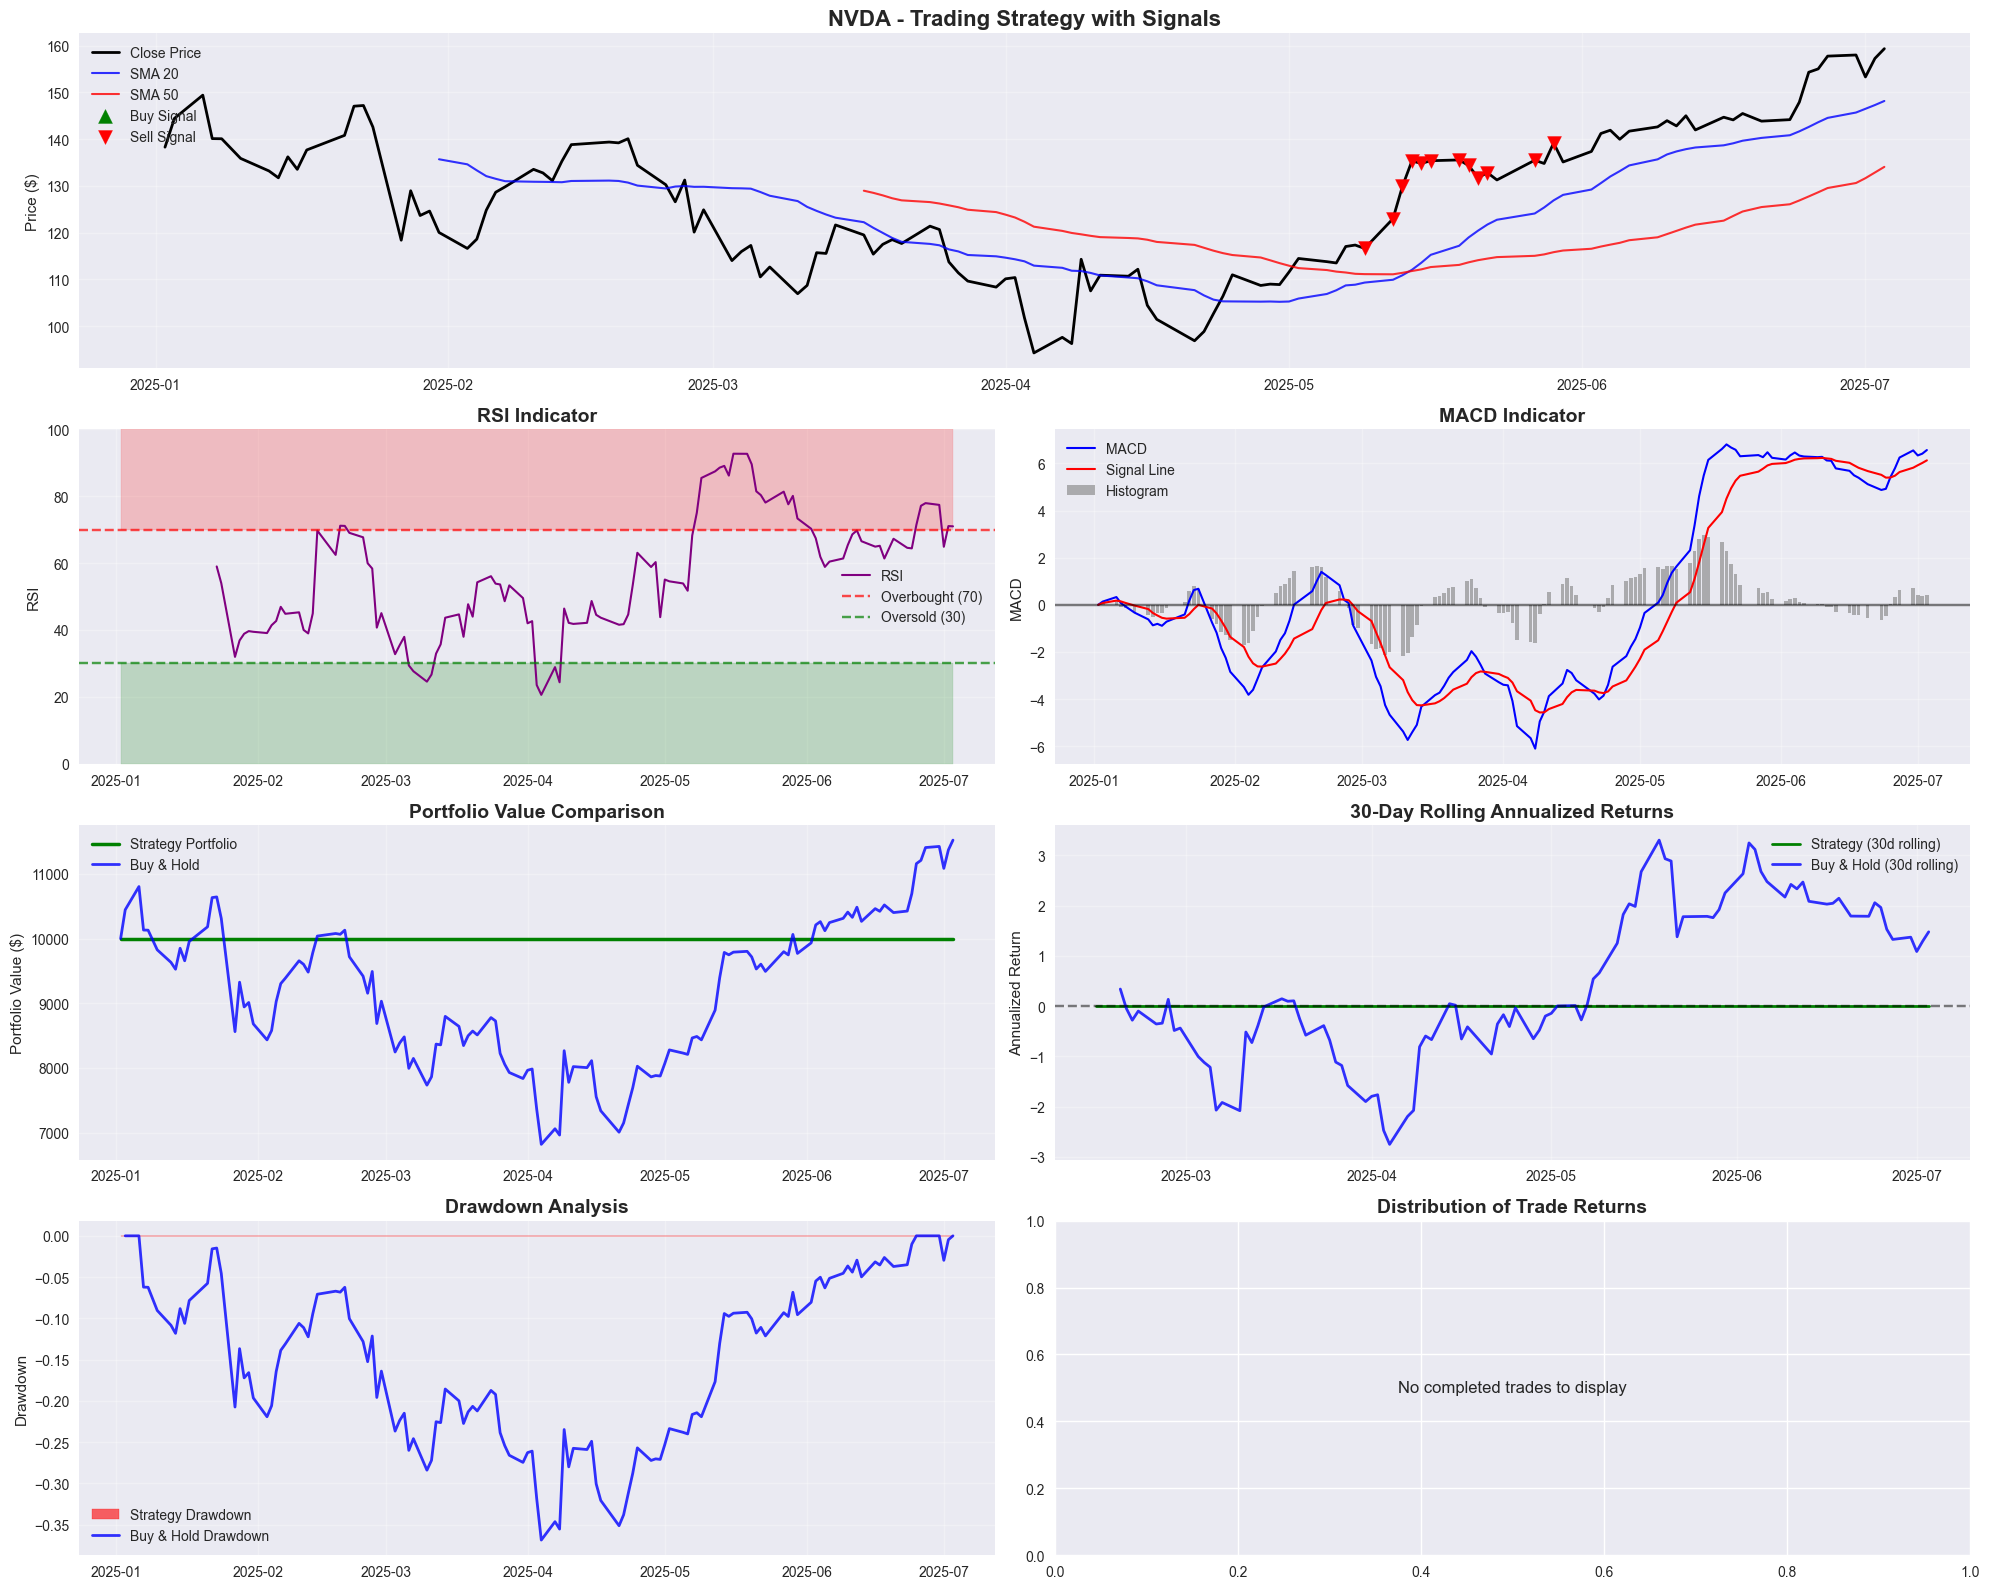


🎯 FINAL STRATEGY SUMMARY FOR NVDA

💰 FINANCIAL PERFORMANCE:
   Initial Capital:     $10,000
   Final Value:         $10,000.00
   Total Return:        0.00%
   Buy & Hold Return:   15.22%
   Excess Return:       -15.22%

📊 RISK METRICS:
   Sharpe Ratio:        0.000
   Maximum Drawdown:    0.00%
   Volatility:          0.00%

🎯 TRADING ACTIVITY:
   Total Signals:       12
   Completed Trades:    0

⏱️  ANALYSIS PERIOD:
   Start Date:          2025-01-02
   End Date:            2025-07-03
   Days Analyzed:       181



In [31]:
# Comprehensive Trading Strategy Visualization

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(20, 16))

# 1. Price Chart with Moving Averages and Trading Signals
ax1 = plt.subplot(4, 2, (1, 2))
ax1.plot(backtest_results.index, backtest_results['Close'], linewidth=2, label='Close Price', color='black')
ax1.plot(backtest_results.index, backtest_results['SMA_20'], linewidth=1.5, label='SMA 20', color='blue', alpha=0.8)
ax1.plot(backtest_results.index, backtest_results['SMA_50'], linewidth=1.5, label='SMA 50', color='red', alpha=0.8)

# Mark buy and sell signals
buy_signals = backtest_results[backtest_results['Signal'] == 1]
sell_signals = backtest_results[backtest_results['Signal'] == -1]

ax1.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', s=100, label='Buy Signal', zorder=5)
ax1.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', s=100, label='Sell Signal', zorder=5)

ax1.set_title(f'{symbol} - Trading Strategy with Signals', fontsize=16, fontweight='bold')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. RSI Indicator
ax2 = plt.subplot(4, 2, 3)
ax2.plot(backtest_results.index, backtest_results['RSI'], linewidth=1.5, color='purple', label='RSI')
ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
ax2.fill_between(backtest_results.index, 70, 100, alpha=0.2, color='red')
ax2.fill_between(backtest_results.index, 0, 30, alpha=0.2, color='green')
ax2.set_title('RSI Indicator', fontsize=14, fontweight='bold')
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. MACD Indicator
ax3 = plt.subplot(4, 2, 4)
ax3.plot(backtest_results.index, backtest_results['MACD'], linewidth=1.5, color='blue', label='MACD')
ax3.plot(backtest_results.index, backtest_results['MACD_Signal'], linewidth=1.5, color='red', label='Signal Line')
ax3.bar(backtest_results.index, backtest_results['MACD_Histogram'], alpha=0.6, color='gray', label='Histogram')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax3.set_title('MACD Indicator', fontsize=14, fontweight='bold')
ax3.set_ylabel('MACD')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Portfolio Value Over Time
ax4 = plt.subplot(4, 2, 5)
# Calculate buy & hold portfolio value for comparison
buy_hold_portfolio = 10000 * (backtest_results['Close'] / backtest_results['Close'].iloc[0])
ax4.plot(backtest_results.index, backtest_results['Portfolio_Value'], linewidth=2.5, color='green', label='Strategy Portfolio')
ax4.plot(backtest_results.index, buy_hold_portfolio, linewidth=2, color='blue', alpha=0.8, label='Buy & Hold')
ax4.set_title('Portfolio Value Comparison', fontsize=14, fontweight='bold')
ax4.set_ylabel('Portfolio Value ($)')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Rolling Returns Comparison
ax5 = plt.subplot(4, 2, 6)
rolling_window = 30
strategy_rolling_returns = backtest_results['Returns'].rolling(rolling_window).mean() * 252
benchmark_rolling_returns = backtest_results['Daily_Return'].rolling(rolling_window).mean() * 252

ax5.plot(backtest_results.index, strategy_rolling_returns, linewidth=2, color='green', label=f'Strategy ({rolling_window}d rolling)')
ax5.plot(backtest_results.index, benchmark_rolling_returns, linewidth=2, color='blue', alpha=0.8, label=f'Buy & Hold ({rolling_window}d rolling)')
ax5.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax5.set_title(f'{rolling_window}-Day Rolling Annualized Returns', fontsize=14, fontweight='bold')
ax5.set_ylabel('Annualized Return')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Drawdown Analysis
ax6 = plt.subplot(4, 2, 7)
# Calculate strategy drawdown
strategy_cumulative = (1 + backtest_results['Returns']).cumprod()
strategy_rolling_max = strategy_cumulative.expanding().max()
strategy_drawdown = (strategy_cumulative - strategy_rolling_max) / strategy_rolling_max

# Calculate benchmark drawdown
benchmark_cumulative = (1 + backtest_results['Daily_Return']).cumprod()
benchmark_rolling_max = benchmark_cumulative.expanding().max()
benchmark_drawdown = (benchmark_cumulative - benchmark_rolling_max) / benchmark_rolling_max

ax6.fill_between(backtest_results.index, strategy_drawdown, 0, alpha=0.6, color='red', label='Strategy Drawdown')
ax6.plot(backtest_results.index, benchmark_drawdown, linewidth=2, color='blue', alpha=0.8, label='Buy & Hold Drawdown')
ax6.set_title('Drawdown Analysis', fontsize=14, fontweight='bold')
ax6.set_ylabel('Drawdown')
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Trade Distribution
ax7 = plt.subplot(4, 2, 8)
if trade_returns:
    ax7.hist(trade_returns, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax7.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Break-even')
    ax7.axvline(x=np.mean(trade_returns), color='green', linestyle='-', linewidth=2, label=f'Mean: {np.mean(trade_returns):.2f}%')
    ax7.set_title('Distribution of Trade Returns', fontsize=14, fontweight='bold')
    ax7.set_xlabel('Trade Return (%)')
    ax7.set_ylabel('Frequency')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
else:
    ax7.text(0.5, 0.5, 'No completed trades to display', ha='center', va='center', transform=ax7.transAxes, fontsize=12)
    ax7.set_title('Distribution of Trade Returns', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary statistics in a nice format
print("\n" + "="*80)
print(f"🎯 FINAL STRATEGY SUMMARY FOR {symbol}")
print("="*80)

print(f"\n💰 FINANCIAL PERFORMANCE:")
print(f"   Initial Capital:     ${10000:,}")
print(f"   Final Value:         ${final_portfolio_value:,.2f}")
print(f"   Total Return:        {strategy_return:.2f}%")
print(f"   Buy & Hold Return:   {buy_hold_return:.2f}%")
print(f"   Excess Return:       {strategy_return - buy_hold_return:.2f}%")

print(f"\n📊 RISK METRICS:")
print(f"   Sharpe Ratio:        {strategy_metrics.get('Sharpe Ratio', 0):.3f}")
print(f"   Maximum Drawdown:    {strategy_metrics.get('Maximum Drawdown', 0):.2%}")
print(f"   Volatility:          {strategy_metrics.get('Volatility', 0):.2%}")

print(f"\n🎯 TRADING ACTIVITY:")
print(f"   Total Signals:       {total_trades}")
print(f"   Completed Trades:    {len(trade_returns) if trade_returns else 0}")
if trade_returns:
    print(f"   Win Rate:            {(winning_trades/len(trade_returns)*100):.1f}%")
    print(f"   Average Trade:       {np.mean(trade_returns):.2f}%")

print(f"\n⏱️  ANALYSIS PERIOD:")
print(f"   Start Date:          {backtest_results.index[0].date()}")
print(f"   End Date:            {backtest_results.index[-1].date()}")
print(f"   Days Analyzed:       {(backtest_results.index[-1] - backtest_results.index[0]).days}")

print("\n" + "="*80)

## 🎉 Congratulations! You've Built Your First Quantitative Trading Strategy!

You've just completed a comprehensive introduction to quantitative trading. Let's review what you've accomplished:

### What You've Learned:
1. **📊 Data Acquisition**: Downloaded and explored real financial data
2. **🔧 Technical Analysis**: Implemented moving averages, RSI, MACD, and Bollinger Bands
3. **🎯 Strategy Development**: Created a systematic moving average crossover strategy with RSI filter
4. **🔄 Backtesting**: Tested your strategy on historical data
5. **📈 Performance Evaluation**: Calculated Sharpe ratio, drawdown, and other key metrics
6. **📊 Visualization**: Created comprehensive charts to analyze strategy behavior

### Key Concepts Mastered:
- **Systematic Trading**: Rules-based approach vs. discretionary trading
- **Risk Management**: Using indicators to filter trades and manage positions
- **Performance Metrics**: Understanding Sharpe ratio, drawdown, and win rates
- **Backtesting**: The importance of testing strategies on historical data
- **Visualization**: How to interpret trading signals and performance charts

### Next Steps in Your Quantitative Trading Journey:

#### 🔍 **Immediate Improvements You Can Try:**
1. **Parameter Optimization**: Try different moving average periods (e.g., 10/30, 50/200)
2. **Additional Filters**: Add volume filters or other technical indicators
3. **Risk Management**: Implement stop-losses and position sizing rules
4. **Different Assets**: Test on different stocks, ETFs, or market sectors

#### 📚 **Continue Learning:**
1. **Module 2**: Advanced technical indicators and pattern recognition
2. **Module 3**: Statistical analysis and mean reversion strategies
3. **Module 4**: Machine learning for trading
4. **Module 5**: Portfolio optimization and risk management
5. **Module 6**: Advanced topics like high-frequency trading and alternative data

#### 💡 **Strategy Ideas to Explore:**
- **Mean Reversion**: Buy when prices are below average, sell when above
- **Momentum**: Follow strong trends in either direction
- **Pairs Trading**: Trade relative performance between two correlated stocks
- **Volatility Trading**: Trade based on changes in market volatility

### 🚨 Important Reminders:
- **Past Performance ≠ Future Results**: Backtesting shows historical performance only
- **Transaction Costs**: Real trading involves spreads, commissions, and slippage
- **Market Regime Changes**: Strategies may work in some market conditions but not others
- **Risk Management**: Never risk more than you can afford to lose
- **Continuous Learning**: Markets evolve, so your strategies should too

### 🎯 Your Assignment:
1. Modify the strategy parameters and observe how performance changes
2. Try the strategy on a different stock or ETF
3. Add one new technical indicator as a filter
4. Document your observations and learnings

**Ready to dive deeper into quantitative trading? Continue with the next module!** 🚀